 ***Understanding the Spread of
Coronavirus (COVID-19) in Ireland
using S-I-R Model and Logistic Growth
Function - Neeraj Waman Chavan - 10521393@mydbs.ie***

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [2]:
#Importing and Loading the CSSEGIS COVID-19 Dataset

global_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

global_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

global_recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

worldwide_countries = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")


In [3]:
#Initial Data Imputation and Pre-Processing to remove NaN values

global_confirmed = global_confirmed.replace(np.nan, '', regex=True)
global_deaths = global_deaths.replace(np.nan, '', regex=True)
global_recovered = global_recovered.replace(np.nan, '', regex=True)
worldwide_countries = worldwide_countries.replace(np.nan, '', regex=True)

In [4]:
#Checking if the data is properly loaded

print(global_confirmed.columns)
print(global_deaths.columns)
print(global_recovered.columns)
print(worldwide_countries.columns)

print(global_confirmed.head())
print(global_deaths.head())
print(global_recovered.head())
print(worldwide_countries.head())

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '8/15/20', '8/16/20', '8/17/20', '8/18/20', '8/19/20', '8/20/20',
       '8/21/20', '8/22/20', '8/23/20', '8/24/20'],
      dtype='object', length=220)
Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '8/15/20', '8/16/20', '8/17/20', '8/18/20', '8/19/20', '8/20/20',
       '8/21/20', '8/22/20', '8/23/20', '8/24/20'],
      dtype='object', length=220)
Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '8/15/20', '8/16/20', '8/17/20', '8/18/20', '8/19/20', '8/20/20',
       '8/21/20', '8/22/20', '8/23/20', '8/24/20'],
      dtype='object', length=220)
Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered'

***Exploratory Data Analysis for Ireland***

In [5]:
#Slicing the dataset to subset data related to Ireland and storing it in respective data-frames

ireland_cases = pd.DataFrame(global_confirmed[global_confirmed["Country/Region"] == "Ireland"])
print(ireland_cases.head())
ireland_deaths = pd.DataFrame(global_deaths[global_deaths["Country/Region"] == "Ireland"])
print(ireland_deaths.head())
ireland_recovered = pd.DataFrame(global_recovered[global_recovered["Country/Region"] == "Ireland"])
print(ireland_recovered.head())

    Province/State Country/Region      Lat    Long  1/22/20  1/23/20  1/24/20  \
147                       Ireland  53.1424 -7.6921        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  8/15/20  8/16/20  8/17/20  8/18/20  \
147        0        0        0  ...    27191    27257    27313    27499   

     8/19/20  8/20/20  8/21/20  8/22/20  8/23/20  8/24/20  
147    27547    27676    27755    27908    27969    28116  

[1 rows x 220 columns]
    Province/State Country/Region      Lat    Long  1/22/20  1/23/20  1/24/20  \
147                       Ireland  53.1424 -7.6921        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  8/15/20  8/16/20  8/17/20  8/18/20  \
147        0        0        0  ...     1774     1774     1774     1775   

     8/19/20  8/20/20  8/21/20  8/22/20  8/23/20  8/24/20  
147     1775     1776     1776     1777     1777     1777  

[1 rows x 220 columns]
    Province/State Country/Region      Lat    Long  1/22/20  1/23/20  1/24/20  \
134

In [6]:
#Aggregating the overall data for summarizing the overall cases in Ireland

ireland_country = pd.DataFrame(worldwide_countries[worldwide_countries["Country_Region"] == "Ireland"])
ireland_data = ireland_country.copy().drop(['Lat','Long_','Country_Region','Last_Update'],axis =1)
ireland_summary = pd.DataFrame(ireland_data.sum()).transpose()
ireland_summary.head()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,28116,1777,23364,2975,569.404,,,6.32024,372,IRL


***Visualizing Total Confirmed Cases in Ireland***

In [12]:
# Defiing a custom colour array which will be used across the template
colour_array = px.colors.qualitative.Light24

#Defining the custom plot function

def draw_plot(ts_array, ts_label, title, colors, mode_size, line_size, x_axis_title , y_axis_title, tickangle = 0, yaxis_type = "", additional_annotations=[]):
#Figure initialization
    fig = go.Figure()
#Ading traces
    for index, ts in enumerate(ts_array):
        fig.add_trace(go.Scatter(x=ts.index,
                                 y = ts.values,
                                 name = ts_label[index],
                                 line=dict(color=colors[index], width=line_size[index]),connectgaps=True,))
#Settng up the X-axis properties
    x_axis_dict = dict(showline=True, 
                       showgrid=True, 
                       showticklabels=True, 
                       linecolor='rgb(204, 204, 204)', 
                       linewidth=2,
                       ticks='outside',
                       tickfont=dict(family='Calibri',size=12,color='rgb(82, 82, 82)',))
#Setting up the parameters for X-axis
    if x_axis_title:
        x_axis_dict['title'] = x_axis_title
    
    if tickangle > 0:
        x_axis_dict['tickangle'] = tickangle
    
#Setting up the Y-axis properties
    y_axis_dict = dict(showline = True,
                       showgrid = True,
                       showticklabels=True,
                       linecolor='rgb(204, 204, 204)',
                       linewidth=2,)
#Setting up the Y-axis parameters
    if yaxis_type != "":
        y_axis_dict['type'] = yaxis_type
    
    if y_axis_title:
        y_axis_dict['title'] = y_axis_title
        
#Formatting the legend
    legend= dict(x=1,
                  y=1,
                  traceorder="normal",
                  font=dict(family="sans-serif",size=12,color="black"),
                  bgcolor="LightSteelBlue",
                  bordercolor="Black",
                  borderwidth=2)

#Designing the Layout
    fig.update_layout(xaxis = x_axis_dict,
                      yaxis = y_axis_dict,
                      autosize=True,
                      margin=dict(autoexpand=False,l=100,r=20,t=110,),
                      showlegend=True,
                      legend = legend
                     )

#Setting up the annotations
    annotations = []
#Title to be appended
    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05, xanchor='left', yanchor='bottom',
                                  text=title,
                                  font=dict(family='Calibri',size=16,color='rgb(37,37,37)'),showarrow=False))
#Adding annotations for parameters
    if len(additional_annotations) > 0:
        annotations.append(additional_annotations)
    
#Layout Update
    fig.update_layout(annotations=annotations)

    return fig

In [13]:
#Creaating Necessary Data-Frames for Visualization

ireland_confirmed = ireland_cases.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1)
ireland_confirmed_summary = ireland_confirmed.sum()
deaths_ireland = ireland_deaths.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1)
deaths_ireland_summary = deaths_ireland.sum()
recovered_ireland = ireland_recovered.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1)
recovered_ireland_summary = recovered_ireland.sum()


In [14]:
#Visualizing total confirmed COVID-19 cases in Ireland

figure1 = go.Figure(data=go.Scatter(x=ireland_confirmed_summary.index, y = ireland_confirmed_summary.values, mode='lines+markers'))
figure1.update_layout(title='Total COVID-19 Cases in Ireland',
                  yaxis_title='Confirmed Cases', xaxis_tickangle = 275 )
figure1.show()

In [15]:
##Visualizing total COVID-19 deaths in Ireland

figure2 = go.Figure(data=go.Scatter(x=deaths_ireland_summary.index, y = deaths_ireland_summary.values, mode='lines+markers'))
figure2.update_layout(title='Total COVID-19 Deaths in Ireland',
                  yaxis_title='Death Cases', xaxis_tickangle = 315 )
figure2.show()

In [16]:
##Visualizing total recovered COVID-19 cases in Ireland

figure3 = go.Figure(data=go.Scatter(x=recovered_ireland_summary.index, y = recovered_ireland_summary.values, mode='lines+markers'))
figure3.update_layout(title='Total COVID-19 Recoveries in Ireland',
                  yaxis_title='Death Cases', xaxis_tickangle = 315 )
figure3.show()

***Creating an aggregated timeseries for Confirmed Cases in Ireland and Visualizing the same***

In [17]:
#Storing the aggregated data into a dataframe

confimed_ireland_agg = ireland_confirmed.sum()
deaths_ireland_agg = deaths_ireland.sum()
recovered_ireland_agg = recovered_ireland.sum()

#Using the series function in Pandas to create a timeseries for the active COVID-19 cases in Ireland
active_cases_agg = pd.Series(
    data=np.array(
        [x1 - x2 - x3  for (x1, x2, x3) in zip(confimed_ireland_agg.values,deaths_ireland_agg.values, recovered_ireland_agg.values)]),
    index= confimed_ireland_agg.index)

In [18]:
ts_array = [confimed_ireland_agg, deaths_ireland_agg, recovered_ireland_agg, active_cases_agg]
labels = ['Confirmed', 'Deaths', 'Recovered', 'Active']
colors = [colour_array[0],  colour_array[12], colour_array[1], colour_array[2]]
mode_size = [8, 8, 12, 8]
line_size = [2, 2, 4, 2]

#Using the above draw_plot template function to plot the aggregated cases graph of Ireland
figure4 = draw_plot(ts_array = ts_array, 
                  ts_label = labels , 
                  title = "Aggregate Covid-19 Cases in Ireland",
                  colors = colors, mode_size = mode_size, 
                  line_size = line_size , 
                  x_axis_title = "Date" , 
                  y_axis_title = "Count of Cases", 
                  tickangle = 315, 
                  yaxis_type = "", additional_annotations=[])

figure4.show()

# S-I-R Model for Ireland

In [19]:
# Importing the necessary libraries\

from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime

In [20]:
#Initializing the dates of the outbreak for Ireland and Sweden

START_DATE = {
  'Ireland': '2/29/20',
  'Sweden':'2/1/20'
}
#Defining the class SIR and setting up the initial parameters of the S-I-R model

class Sir(object):
    def __init__(self, country, loss, start_date = '2/29/20', predict_range=100,s_0=10000, i_0=1, r_0=0):
        self.country = country
        self.loss = loss
        self.start_date = start_date
        self.predict_range = predict_range
        self.s_0 = s_0
        self.i_0 = i_0
        self.r_0 = r_0

#Creating a function to load confirmed cases data

    def load_confirmed(self, country):
        df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
        df = df.drop(['Province/State'],axis =1)
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]

#Creating a function to load recovered data

    def load_recovered(self, country):
        df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
        df = df.drop(['Province/State'],axis =1)
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]

#Creating a function to load deaths data

    def load_dead(self, country):
        df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
        df = df.drop(['Province/State'],axis =1)
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]

#Creating a date-time function to append predictions by the model    

    def extend_index(self, index, new_size):
        values = index.values
        current = datetime.strptime(index[-1], '%m/%d/%y')
        while len(values) < new_size:
            current = current + timedelta(days=1)
            values = np.append(values, datetime.strftime(current, '%m/%d/%y'))
        return values

#Defining the predict function to forecast how the count of cases in each compartment will change in near future

    def predict(self, beta, gamma, data, recovered, death, country, s_0, i_0, r_0):
        new_index = self.extend_index(data.index, self.predict_range)
        size = len(new_index)
        def SIR(t, y):
            S = y[0]
            I = y[1]
            R = y[2]
            return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
        extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
        extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
        extended_death = np.concatenate((death.values, [None] * (size - len(death.values))))
        return new_index, extended_actual, extended_recovered, extended_death, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

#Training the model to optimize and estimate the parameters beta and gamma by fitting the model to the actual data of cases

    def train(self):
        recovered = self.load_recovered(self.country)
        death = self.load_dead(self.country)
        data = (self.load_confirmed(self.country) - recovered - death)
        
        optimal = minimize(
            loss, 
            [0.001, 0.001], 
            args=(data, recovered, self.s_0, self.i_0, self.r_0), 
            method='L-BFGS-B', 
            bounds=[(0.000001, 0.4), (0.000001, 0.4)]
        )
        print(optimal)
        beta, gamma = optimal.x
        new_index, extended_actual, extended_recovered, extended_death, prediction = self.predict(beta, gamma, data, recovered, death, self.country, self.s_0, self.i_0, self.r_0)
        df = pd.DataFrame({'Infected data': extended_actual, 'Recovered data': extended_recovered, 'Death data': extended_death, 'Susceptible': prediction.y[0], 'Infected': prediction.y[1], 'Recovered': prediction.y[2]}, index=new_index)
        df.to_csv(f"{self.country}.csv")
        fig, ax = plt.subplots(figsize=(15, 10))
        ax.set_title(self.country)
        df.plot(ax=ax)
        print(f"country={self.country}, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
        fig.savefig(f"{self.country}.png")
        
        return df, fig

In [21]:
#Defining the loss function based on Root Mean Squared Error(RMSE)

def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    loss1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    loss2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * loss1 + (1 - alpha) * loss2

### ***Running the SIR Model for Ireland***

In [22]:
sir_ireland = Sir(country="Ireland", loss= loss )

      fun: 9445.922035780965
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.20614026e+08, 1.08756831e+02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 300
      nit: 18
   status: 0
  success: True
        x: array([3.46031192e-05, 6.46478243e-02])
country=Ireland, beta=0.00003460, gamma=0.06464782, r_0:0.00053526


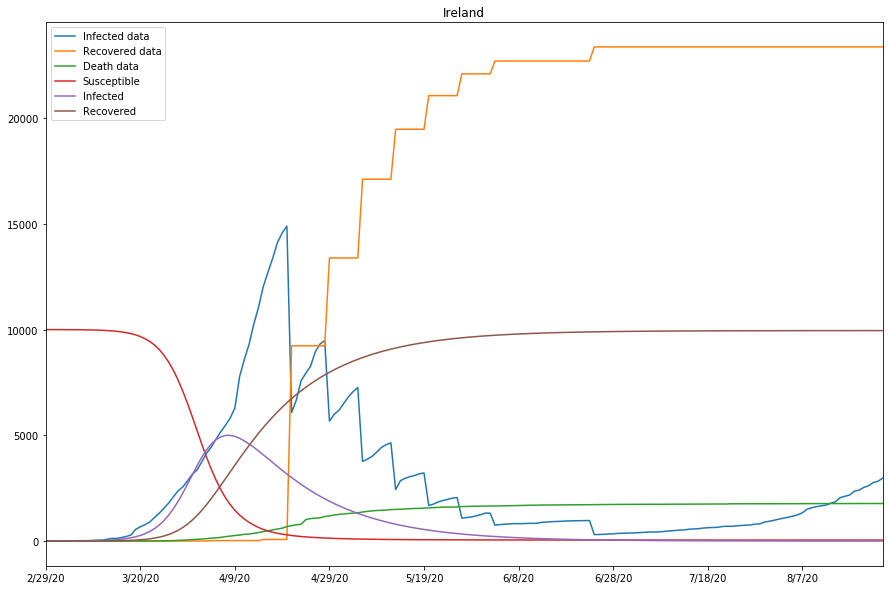

In [23]:
#Training the model for Ireland
ireland_df, ireland_figure = sir_ireland.train()

In [24]:
#Reading the data from the generated CSV of model predictions and storing it

ireland_sir_model = pd.read_csv('Ireland.csv')

In [25]:
#checking the first 10 rows to see if the csv is generated properly

ireland_sir_model.head(10)

,Unnamed: 0,Infected data,Recovered data,Death data,Susceptible,Infected,Recovered
0,2/29/20,1,0,0,10000.000000,1.000000,0.000000
1,3/1/20,1,0,0,9999.600373,1.324964,0.074662
2,3/2/20,1,0,0,9999.070950,1.755471,0.173579
3,3/3/20,2,0,0,9998.369352,2.325974,0.304674
4,3/4/20,6,0,0,9997.440363,3.081367,0.478270
5,3/5/20,6,0,0,9996.209942,4.081841,0.708217
6,3/6/20,18,0,0,9994.578786,5.408113,1.013101
7,3/7/20,18,0,0,9992.417964,7.164959,1.417077
8,3/8/20,19,0,0,9989.560621,9.487988,1.951391
9,3/9/20,21,0,0,9985.779256,12.562047,2.658697


In [26]:
#Storing the data upto 30th June for plotting

ireland_sir_model = ireland_sir_model[:153]

### ***Creating a custom graph function to visualize the prediction***

In [27]:
def prediction_graph(title, df_sir, remove_series=[],yaxis_type="", yaxis_title=""):
    fig = go.Figure()
    title = title
    labels = ['Infected data','Susceptible','Infected','Recovered']
    colors = [colour_array[0], colour_array[12],colour_array[2], colour_array[1]]
    line_size = [2, 2, 2, 2]
    
    for index, data_series in enumerate(labels):
        if data_series not in remove_series:
            fig.add_trace(go.Scatter(x=df_sir.index, 
                                           y = df_sir[data_series], 
                                           name = labels[index],
                                           line=dict(
                                               color=colors[index], 
                                               width=line_size[index]),
                                           connectgaps=True,))
    xaxis= dict(
        title = "Date",
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickangle = 280,
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',),)
    yaxis = dict(
        title = "Case Count",
        showline = True,
        showgrid = True,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,)
    
    if yaxis_type!="":
        yaxis['type'] = yaxis_type
    
    if yaxis_title !="":
        yaxis['title'] = yaxis_title
    
    fig.update_layout(
        xaxis = xaxis,
        yaxis = yaxis,
        autosize=True,
        margin=dict(autoexpand=True,l=100,r=20,t=110,),
        showlegend=True)

    annotations = []

    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text=title,
                              font=dict(family='Arial',
                                        size=16,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

    fig.update_layout(annotations=annotations)
    
    return fig
    

In [28]:
#Visualizing the SIR model for Ireland

figure5 = prediction_graph(title="SIR Model Simulation for Ireland", df_sir= ireland_sir_model)
figure5.show()

### ***Evaluating the predictions***

In [29]:
#Storing the actual and predicted values for first 40 days into dataframes

y_pred = pd.to_numeric(ireland_sir_model['Infected'])
y_true = pd.to_numeric(ireland_sir_model['Infected data'])

y_pred = pd.DataFrame(y_pred)
y_true = pd.DataFrame(y_true)

y_pred = y_pred.head(40)
y_true = y_true.head(40)

In [30]:
#Importing the R2 score metric and calculating the R2 score of the model (for first 40 days)

from sklearn.metrics import r2_score
r2_score(y_true, y_pred)

0.9717923517452971

***SIR Model for Sweden***

In [31]:
sir_sweden = Sir(country="Sweden", start_date='2/1/20', loss= loss)

      fun: 3685.3825698522924
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([3.99075816e+01, 7.19862637e+05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 153
      nit: 11
   status: 0
  success: True
        x: array([1.58655308e-05, 1.00000000e-06])
country=Sweden, beta=0.00001587, gamma=0.00000100, r_0:15.86553081


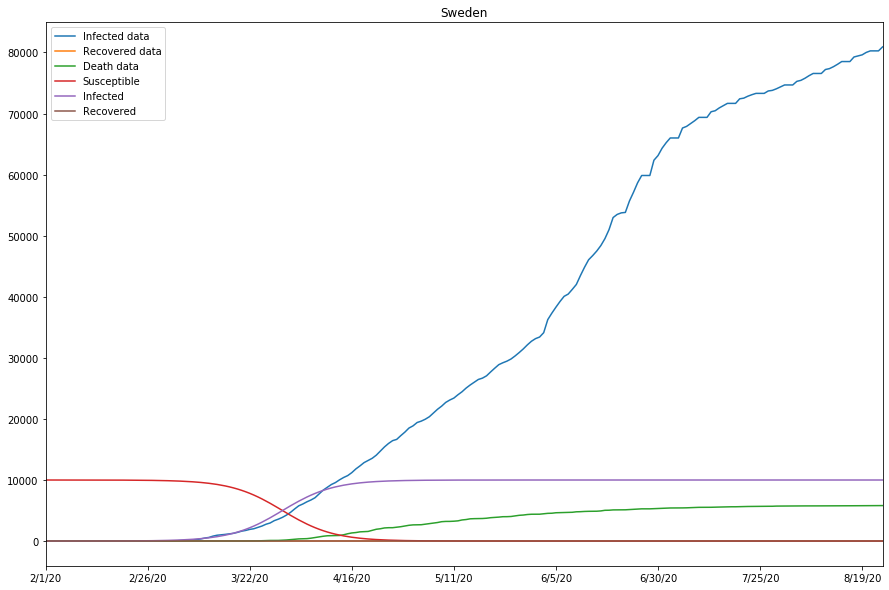

In [32]:
#Training the SIR model for Sweden

sweden_df, sweden_figure = sir_sweden.train()

In [33]:
#Reading the data from the generated CSV of model predictions and storing it

sweden_sir_model = pd.read_csv('Sweden.csv')

In [34]:
#checking the first 10 rows to see if the csv is generated properly

sweden_sir_model.head(10)

,Unnamed: 0,Infected data,Recovered data,Death data,Susceptible,Infected,Recovered
0,2/1/20,1,0,0,10000.000000,1.000000,0.000000
1,2/2/20,1,0,0,9999.828068,1.171931,0.000001
2,2/3/20,1,0,0,9999.626569,1.373429,0.000002
3,2/4/20,1,0,0,9999.390323,1.609673,0.000004
4,2/5/20,1,0,0,9999.113653,1.886341,0.000006
5,2/6/20,1,0,0,9998.789639,2.210353,0.000008
6,2/7/20,1,0,0,9998.409907,2.590083,0.000010
7,2/8/20,1,0,0,9997.964622,3.035365,0.000013
8,2/9/20,1,0,0,9997.442494,3.557490,0.000016
9,2/10/20,1,0,0,9996.830747,4.169233,0.000020


In [36]:
#Storing the data upto 30th June for plotting

sweden_sir_model = sweden_sir_model[:153]

In [37]:
#Visualizing the SIR model for Sweden

figure6 = prediction_graph(title="SIR Model Simulation for Sweden", df_sir= sweden_sir_model)
figure6.show()

## ***Implementing the Logistic Growth Model based on The Logistic Growth Function for Ireland***

In [38]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
#Setting the initial number of cases and the number of days for which the predictions have to made

init0 = 10
days_pred = 45

In [41]:
#Loading the County Level Dataset of confirmed COVID cases in Ireland and checking it

county_data = pd.read_csv("Covid19CountyStatisticsHPSCIreland.csv")
county_data.head()

,CountyName,TimeStamp,ConfirmedCovidCases
0,Carlow,2020-02-27,0
1,Cavan,2020-02-27,0
2,Clare,2020-02-27,0
3,Cork,2020-02-27,0
4,Donegal,2020-02-27,0


In [42]:
#Creating a subset of data for Dublin County by slicing the data and filtering out cases for Dublin county and creating a days column

dublin_data = county_data.loc[county_data['CountyName'] == "Dublin", :].loc[county_data['ConfirmedCovidCases'] >= init0, :]
dublin_data['days'] = range(dublin_data.shape[0])

In [43]:
#Checking if the data is stored properly
dublin_data.head()

,CountyName,TimeStamp,ConfirmedCovidCases,days
551,Dublin,2020-03-21,471,0
577,Dublin,2020-03-22,535,1
603,Dublin,2020-03-23,659,2
629,Dublin,2020-03-24,774,3
655,Dublin,2020-03-25,922,4


### ***Defining the Logistic Growth Function for the Model for Dublin***

In [44]:
#importing the necessary libraries

from scipy.stats import beta
from scipy import optimize

#Defining the logistic growth function with initial parameters

def logistic_model(init0, pop, theta, N):
  gamma = theta[0]
  kappa = theta[1]
  alpha = theta[2]

  y_pred = []
  y_current = init0
  for i in range(N):
    y_next = (1 + gamma * (1 - (y_current/(kappa * pop))**alpha)) * y_current
    y_current = y_next
    y_pred.append(y_next)

  return y_pred

def value_func(y, init0, pop, theta):
    N = len(y)
    y_pred = logistic_model(init0, pop, theta, N)
    val = np.sqrt(np.mean([(a - b) **2 for a, b in zip(y_pred, y)]))
    return val

In [45]:
y = dublin_data.loc[:,'ConfirmedCovidCases'] 

#Optimizing the function for estimating the parameters by minimizing the squared sum of errors

fit = optimize.minimize(
    fun = lambda theta: value_func(y/10000, init0/10000, 138, theta), #population of Dublin was considered to be 1.38 million
    x0 = [500/10000, 0.04, 1], 
    method='SLSQP', 
    bounds= ((0, np.inf), (0, 1), (0, 1)), 
    tol = 1E-12,
    options={'maxiter': 1000}
    )

print(fit)

C:\Users\Neeraj Chavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\Neeraj Chavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\Neeraj Chavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Neeraj Chavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

invalid value encountered in double_scalars



     fun: 0.038977868899832846
     jac: array([ 1.79279596e-07,  1.63618336e-03, -1.55598167e-02])
 message: 'Optimization terminated successfully.'
    nfev: 2090
     nit: 376
    njev: 376
  status: 0
 success: True
       x: array([1.99433653e+02, 8.83805866e-03, 5.04152846e-04])


In [46]:
#Predictions for Dublin
pred_dub = [dublin_data['ConfirmedCovidCases'].tolist()[-1]] + [x * 10000 for x in logistic_model(dublin_data['ConfirmedCovidCases'].tolist()[-1]/10000, 138, fit['x'], 30)]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139],
 <a list of 140 Text xticklabel objects>)

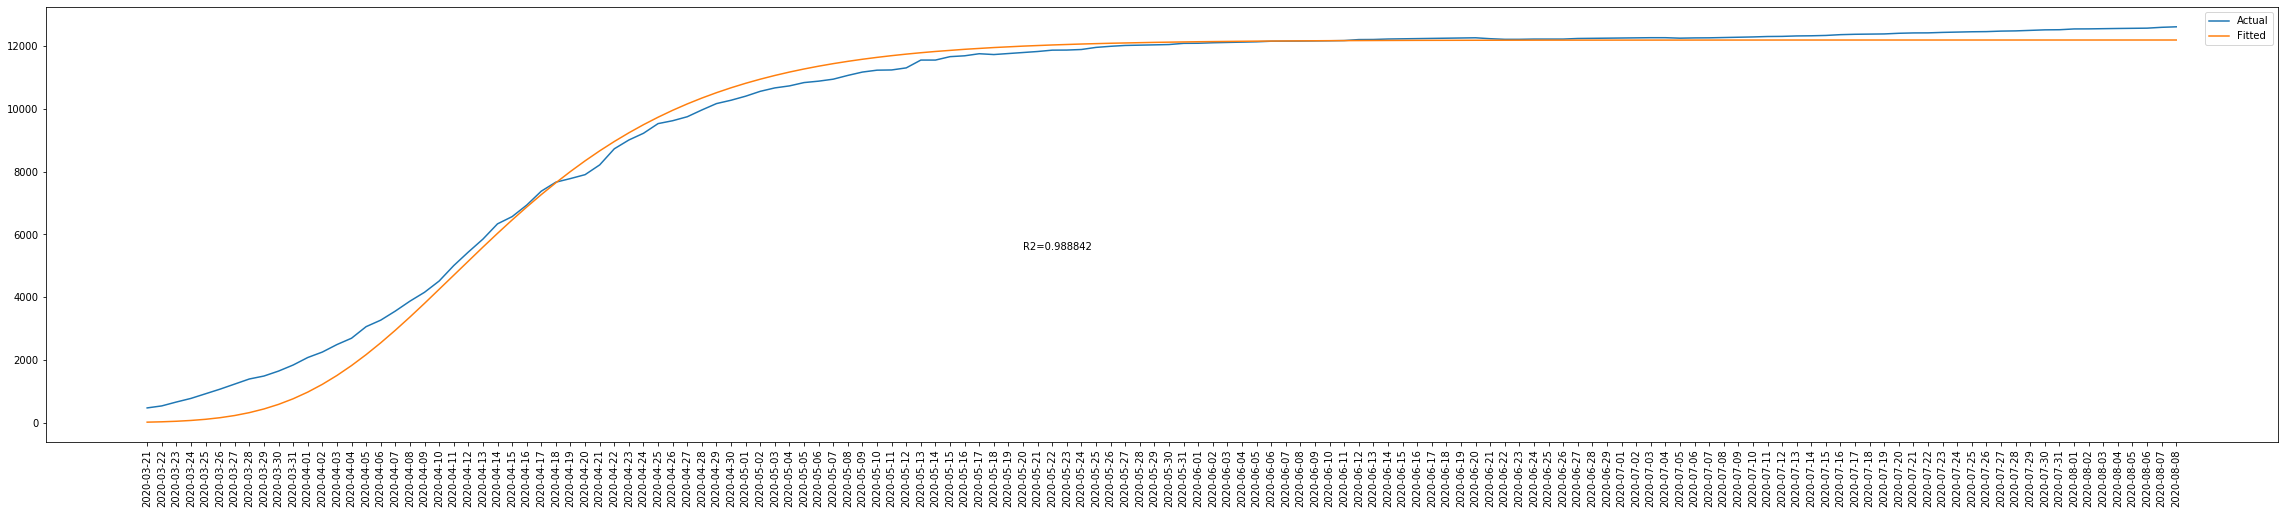

In [47]:
#Plotting the graph of fiited model on actual data

fig = plt.figure(figsize = (40, 8))
ax = fig.add_subplot(1, 1, 1)
y_fit = [x * 10000 for x in logistic_model(init0/10000, 138, fit['x'], len(dublin_data['ConfirmedCovidCases']))]
y_val = dublin_data['ConfirmedCovidCases']

#Calculating the R2 score
r2score = 1 - np.sum((y_val - y_fit)**2)/np.sum((y_val - np.mean(y_val))**2)

ax.plot(dublin_data['TimeStamp'], y_val, label = "Actual")
ax.plot(dublin_data['TimeStamp'], y_fit, label = 'Fitted')

#Defining the placement of the R2 Score on the graph
ax.text('2020-05-20', 5500, 'R2=%f'%r2score)

ax.legend(loc='best')

plt.xticks(rotation = 90)

In [48]:
#Adding the dates to a list using the datetime function and storing them

datemin = np.datetime64(dublin_data['TimeStamp'].tolist()[0])
datemax = np.datetime64(dublin_data['TimeStamp'].tolist()[-1])

historical_dates = [datemin + np.timedelta64(x, 'D') for x in range(dublin_data.shape[0])]
predicted_dates = [datemax] + [datemax + np.timedelta64(x, 'D') for x in range(1, 31)]

In [49]:
#Aggregating the cumulative number of cases and cumulative dates

cumulative_cases = dublin_data['ConfirmedCovidCases'].tolist() + pred_dub
cumuative_dates = historical_dates[1:] + predicted_dates  

### ***Visualizing the projections for Dublin***

(array([737516., 737546., 737577., 737607., 737638., 737669.]),
 <a list of 6 Text xticklabel objects>)

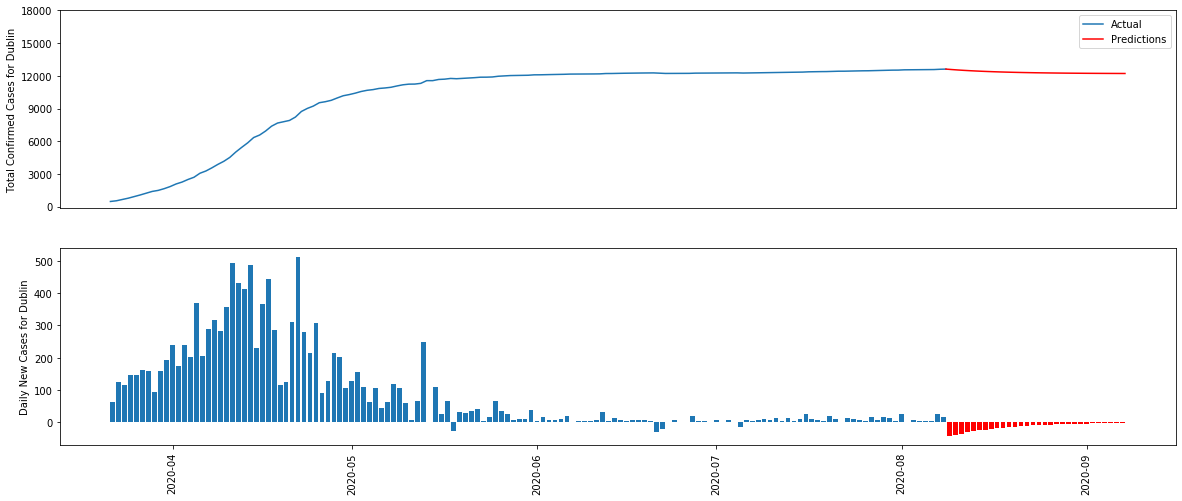

In [50]:
#Plotting the graph of projected cases by the model

fig = plt.figure(figsize = (20, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(historical_dates, dublin_data['ConfirmedCovidCases'].tolist(), label = 'Actual')
ax1.plot(predicted_dates, pred_dub, label = 'Predictions', color = "Red")
ax1.set_xticks([])
ax1.set_yticks(range(0, 21000, 3000))
ax1.set_ylabel('Total Confirmed Cases for Dublin')
ax1.legend(loc = 'best')

ax2.bar(historical_dates[1:], np.diff(dublin_data['ConfirmedCovidCases']), label = "Actual")
ax2.bar(predicted_dates[1:], np.diff(pred_dub), color = "Red")
ax2.set_ylabel('Daily New Cases for Dublin')
plt.xticks(rotation = 90)

In [51]:
#Fitting the trend line for the predictions

trend_fit = [x * 10000 for x in logistic_model(init0/10000, 138, fit['x'], dublin_data.shape[0] + 30)]
trend_hist = dublin_data['ConfirmedCovidCases'].tolist()
historical_dates = [datemin + np.timedelta64(x, 'D') for x in range(dublin_data.shape[0])]
predicted_dates = [datemin + np.timedelta64(x, 'D') for x in range(dublin_data.shape[0] + 30)]

C:\Users\Neeraj Chavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



(array([737516., 737546., 737577., 737607., 737638., 737669.]),
 <a list of 6 Text xticklabel objects>)

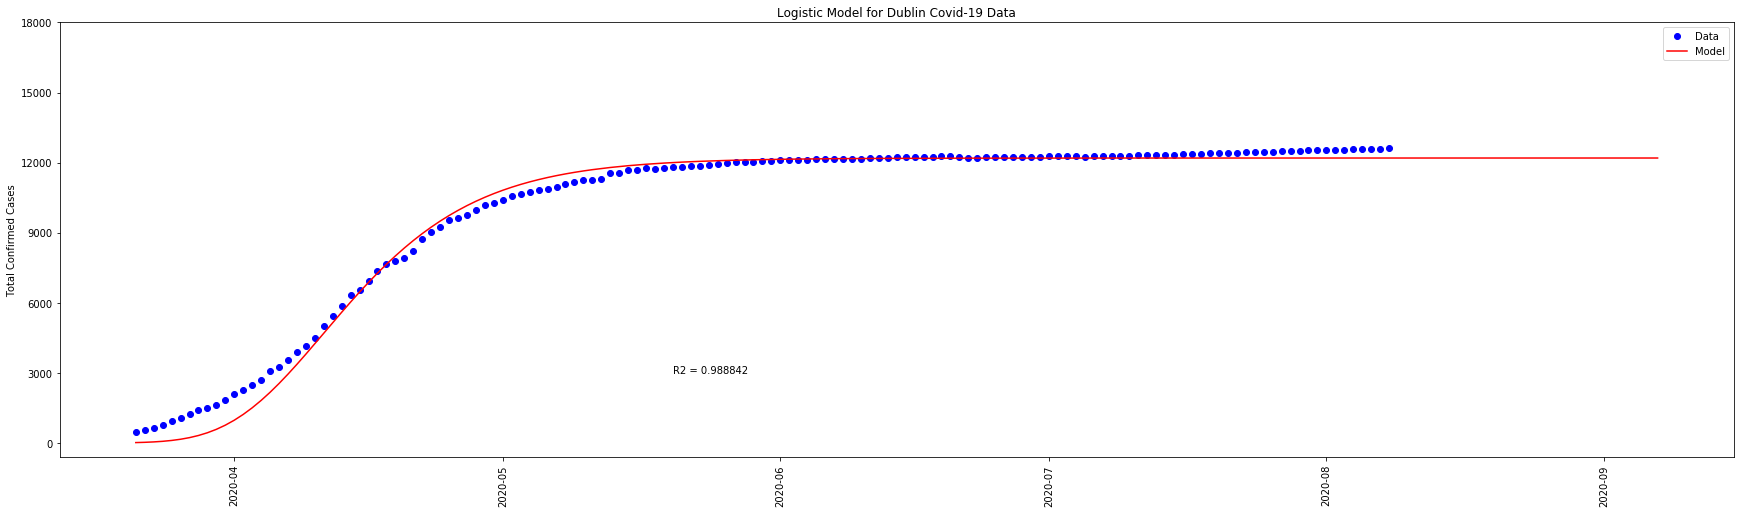

In [52]:
fig = plt.figure(figsize = (30, 8))
plt.title('Logistic Model for Dublin Covid-19 Data')
ax = fig.add_subplot(1, 1, 1)

ax.plot(historical_dates, trend_hist, 'bo',label = 'Data')
ax.plot(predicted_dates, trend_fit, label = 'Model', color = 'Red')
ax.set_yticks(range(0, 21000, 3000))
ax.set_ylabel('Total Confirmed Cases')
ax.legend(loc = 'best')
ax.text(np.datetime64('2020-05-20'), 3000, "R2 = %f"%r2score)
#ax.text(np.datetime64('2020-03-08'), 16000, "Model: C(t+1) = C(t) + 22659 * {1 - [C(t)/(0.001 * 138)]^(0.313)}")

plt.xticks(rotation = 90)

### ***Implementing the Model for Kildare***

In [53]:
#loading the data for kildare

kildare_data = county_data.loc[county_data['CountyName'] == "Kildare", :].loc[county_data['ConfirmedCovidCases'] >= init0, :]
kildare_data['days'] = range(kildare_data.shape[0])

In [54]:
#Optimizing the fucntion to estimate the parameters by minimizing the sum of squared errors

y = kildare_data.loc[:,'ConfirmedCovidCases'] 
fit = optimize.minimize(
    fun = lambda theta: value_func(y/10000, init0/10000, 22, theta), #population for kildare was taken as 0.22million
    x0 = [100/10000, 0.04, 1], 
    method='SLSQP', 
    bounds= ((0, np.inf), (0, 1), (0, 1)), 
    tol = 1E-12,
    options={'maxiter': 1000}
    )

print(fit)

C:\Users\Neeraj Chavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\Neeraj Chavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\Neeraj Chavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Neeraj Chavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

invalid value encountered in double_scalars



     fun: 0.006611281647304751
     jac: array([-2.29745638e-07, -1.13265123e-05, -5.42495400e-07])
 message: 'Optimization terminated successfully.'
    nfev: 385
     nit: 71
    njev: 71
  status: 0
 success: True
       x: array([0.51816384, 0.00683529, 0.16667238])


In [55]:
pred_kil = [kildare_data['ConfirmedCovidCases'].tolist()[-1]] + [x * 10000 for x in logistic_model(kildare_data['ConfirmedCovidCases'].tolist()[-1]/10000, 22, fit['x'], 30)]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139],
 <a list of 140 Text xticklabel objects>)

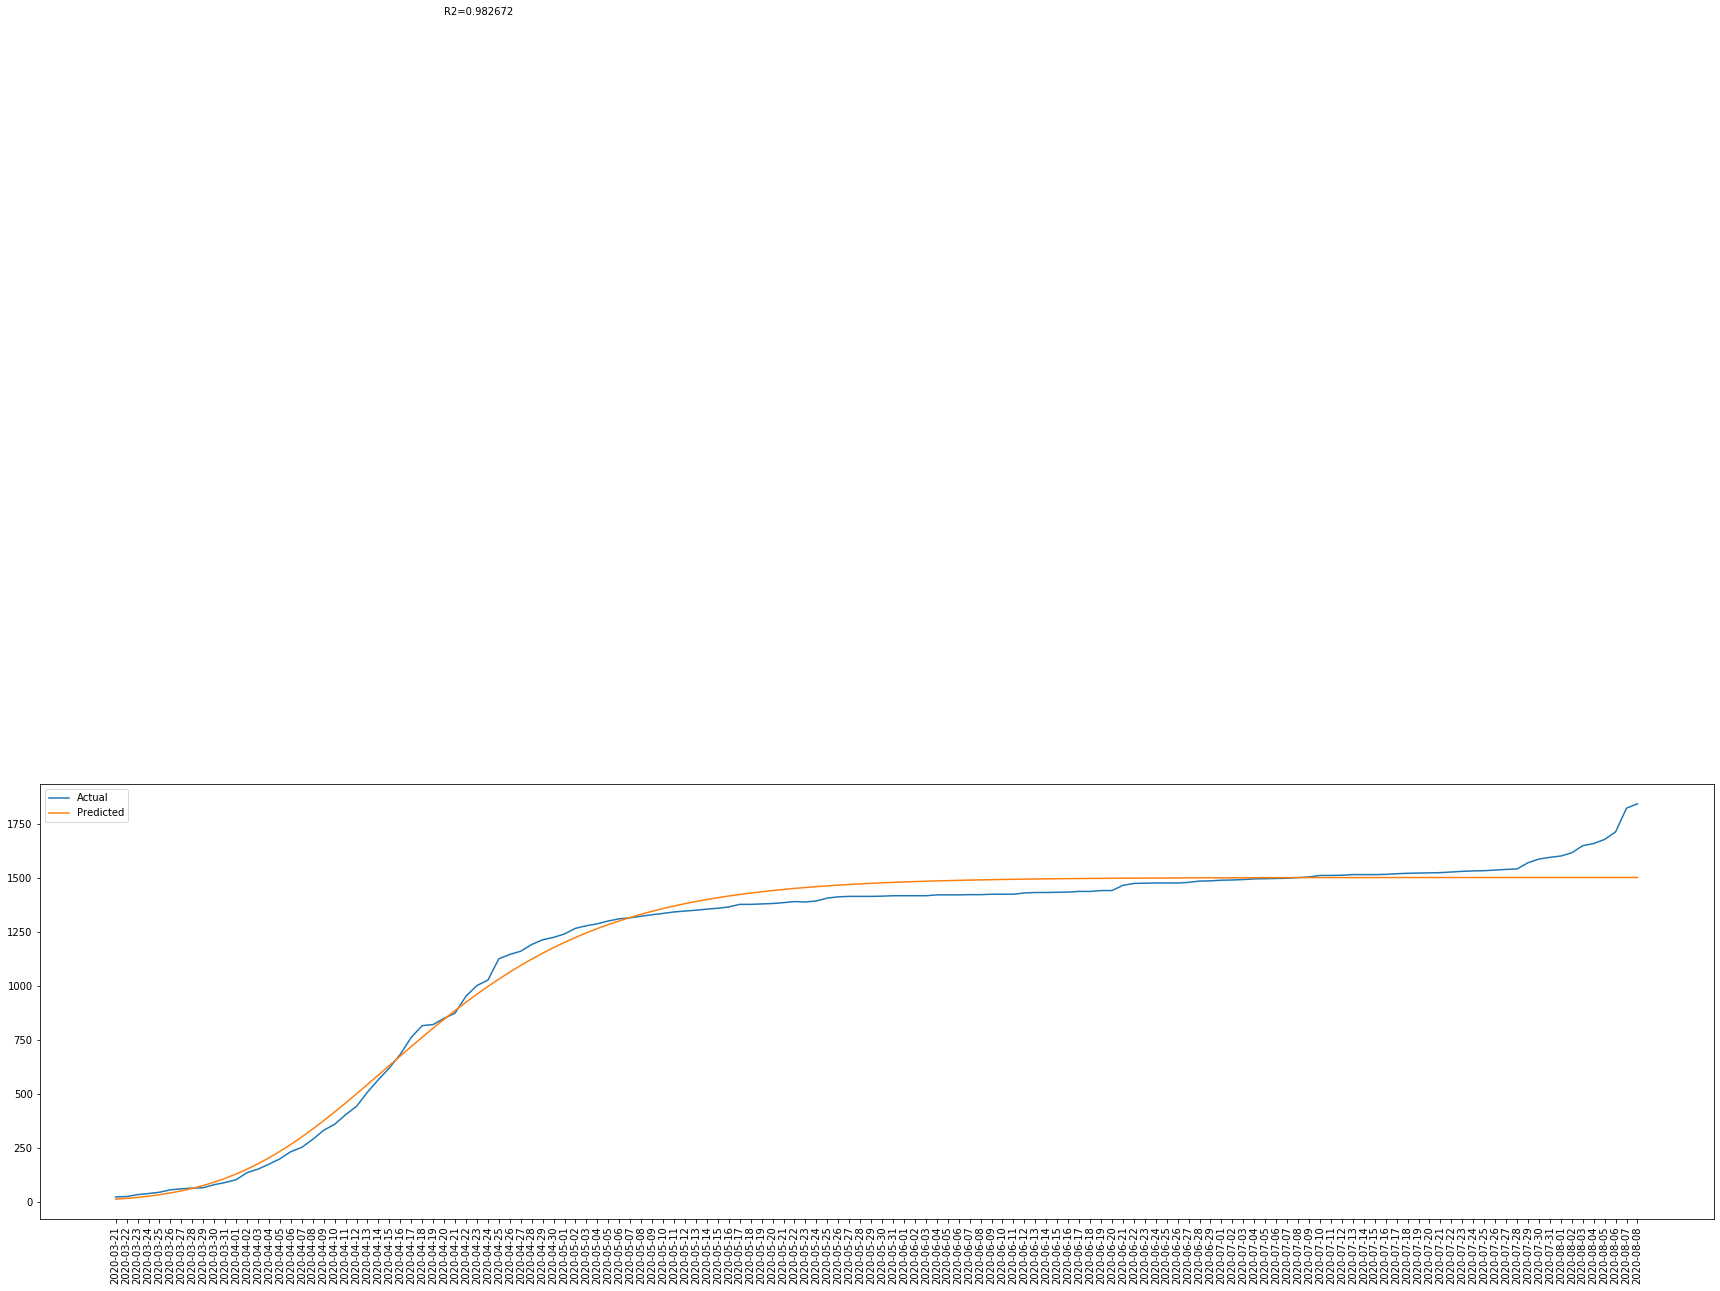

In [56]:
fig = plt.figure(figsize = (30, 8))
ax = fig.add_subplot(1, 1, 1)
y_fit = [x * 10000 for x in logistic_model(init0/10000, 22, fit['x'], len(kildare_data['ConfirmedCovidCases']))]
y_val = kildare_data['ConfirmedCovidCases']

r2score_kil = 1 - np.sum((y_val - y_fit)**2)/np.sum((y_val - np.mean(y_val))**2)

ax.plot(kildare_data['TimeStamp'], y_val, label = "Actual")
ax.plot(kildare_data['TimeStamp'], y_fit, label = 'Predicted')

ax.text('2020-04-20', 5500, 'R2=%f'%r2score_kil)

ax.legend(loc='best')

plt.xticks(rotation = 90)

In [57]:
datemin_kl = np.datetime64(kildare_data['TimeStamp'].tolist()[0])
datemax_kl = np.datetime64(kildare_data['TimeStamp'].tolist()[-1])

historical_dates_kl = [datemin_kl + np.timedelta64(x, 'D') for x in range(kildare_data.shape[0])]
predicted_dates_kl = [datemax_kl] + [datemax_kl + np.timedelta64(x, 'D') for x in range(1, 31)]

In [58]:
cumulative_cases_kl = kildare_data['ConfirmedCovidCases'].tolist() + pred_kil
cumuative_dates_kl = historical_dates_kl[1:] + predicted_dates_kl

(array([737516., 737546., 737577., 737607., 737638., 737669.]),
 <a list of 6 Text xticklabel objects>)

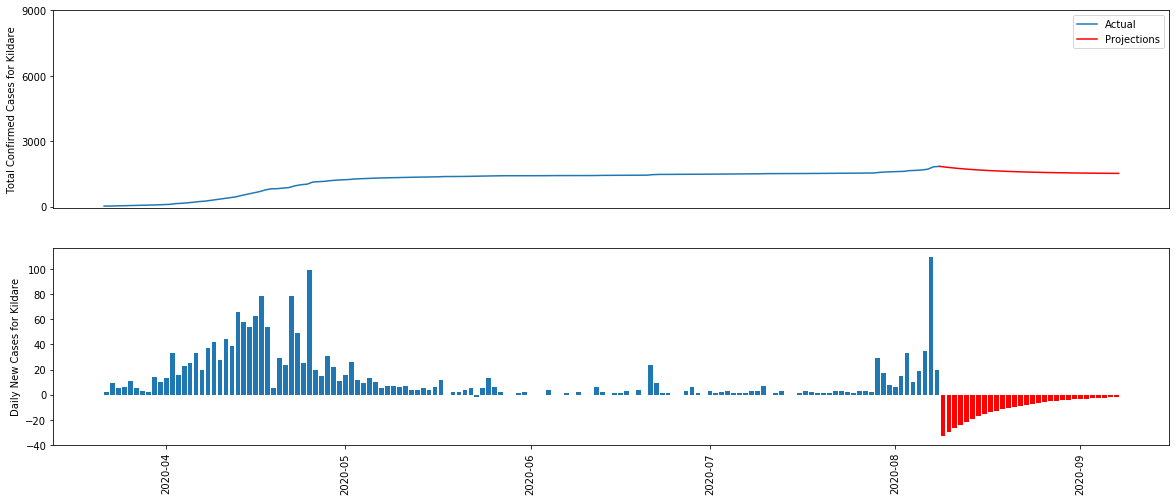

In [59]:
fig = plt.figure(figsize = (20, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(historical_dates_kl, kildare_data['ConfirmedCovidCases'].tolist(), label = 'Actual')
ax1.plot(predicted_dates_kl, pred_kil, label = 'Projections', color = "Red")
ax1.set_xticks([])
ax1.set_yticks(range(0, 10000, 3000))
ax1.set_ylabel('Total Confirmed Cases for Kildare')
ax1.legend(loc = 'best')

ax2.bar(historical_dates_kl[1:], np.diff(kildare_data['ConfirmedCovidCases']), label = "Actual")
ax2.bar(predicted_dates_kl[1:], np.diff(pred_kil), color = "Red")
ax2.set_ylabel('Daily New Cases for Kildare')
plt.xticks(rotation = 90)

In [60]:
trend_fit_kl = [x * 10000 for x in logistic_model(init0/10000, 22, fit['x'], kildare_data.shape[0] + 30)]
trend_hist_kl = kildare_data['ConfirmedCovidCases'].tolist()
historical_dates_kl = [datemin + np.timedelta64(x, 'D') for x in range(kildare_data.shape[0])]
predicted_dates_kl = [datemin + np.timedelta64(x, 'D') for x in range(kildare_data.shape[0] + 30)]

C:\Users\Neeraj Chavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



(array([737516., 737546., 737577., 737607., 737638., 737669.]),
 <a list of 6 Text xticklabel objects>)

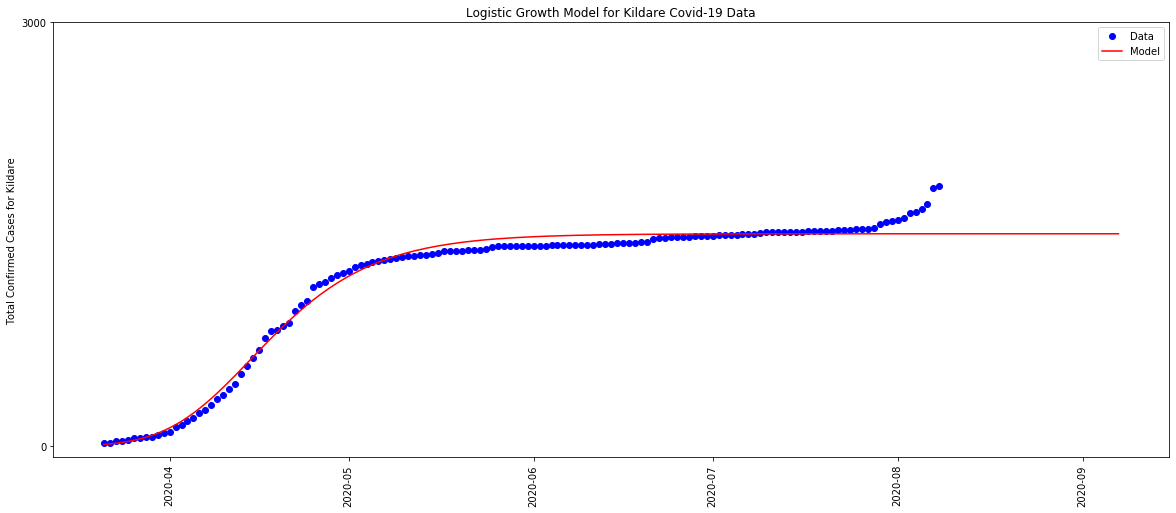

In [61]:
fig = plt.figure(figsize = (20, 8))
plt.title('Logistic Growth Model for Kildare Covid-19 Data')
ax = fig.add_subplot(1, 1, 1)

ax.plot(historical_dates_kl, trend_hist_kl, 'bo',label = 'Data')
ax.plot(predicted_dates_kl, trend_fit_kl, label = 'Model', color = 'Red')
ax.set_yticks(range(0, 5000, 3000))
ax.set_ylabel('Total Confirmed Cases for Kildare')
ax.legend(loc = 'best')

plt.xticks(rotation = 90)

## ***Implementing the Logistic Model for whole of Ireland data***

In [62]:
#Loading the dataset for overall confirmed Irealand cases

overall_data = pd.read_csv("IrelandConfirmedData.csv")
overall_data.head()

,Country/Region,Confirmed,Recovered,Deaths,Date,Days
0,Ireland,1,0,0,2020-02-29,0
1,Ireland,1,0,0,2020-03-01,1
2,Ireland,1,0,0,2020-03-02,2
3,Ireland,2,0,0,2020-03-03,3
4,Ireland,6,0,0,2020-03-04,4


In [63]:
#Optimizing the fucntion to estimate the parameters by minimizing the sum of squared errors

y = overall_data.loc[:,'Confirmed'] 
fit = optimize.minimize(
    fun = lambda theta: value_func(y/10000, init0/10000, 486, theta), #population for Irealnd was taken as 4.86 million
    x0 = [500/10000, 0.04, 1], 
    method='SLSQP', 
    bounds= ((0, np.inf), (0, 1), (0, 1)), 
    tol = 1E-12,
    options={'maxiter': 1000}
    )

print(fit)

C:\Users\Neeraj Chavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\Neeraj Chavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning:

overflow encountered in double_scalars

C:\Users\Neeraj Chavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Neeraj Chavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

divide by zero encountered in double_scalars



     fun: 0.02743768777641414
     jac: array([0.00029288, 0.03510273, 0.00010155])
 message: 'Optimization terminated successfully.'
    nfev: 244
     nit: 41
    njev: 41
  status: 0
 success: True
       x: array([0.23354356, 0.00523122, 0.3841668 ])


In [64]:
pred_irl = [overall_data['Confirmed'].tolist()[-1]] + [x * 10000 for x in logistic_model(overall_data['Confirmed'].tolist()[-1]/10000, 486, fit['x'], 30)]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145],
 <a list of 146 Text xticklabel objects>)

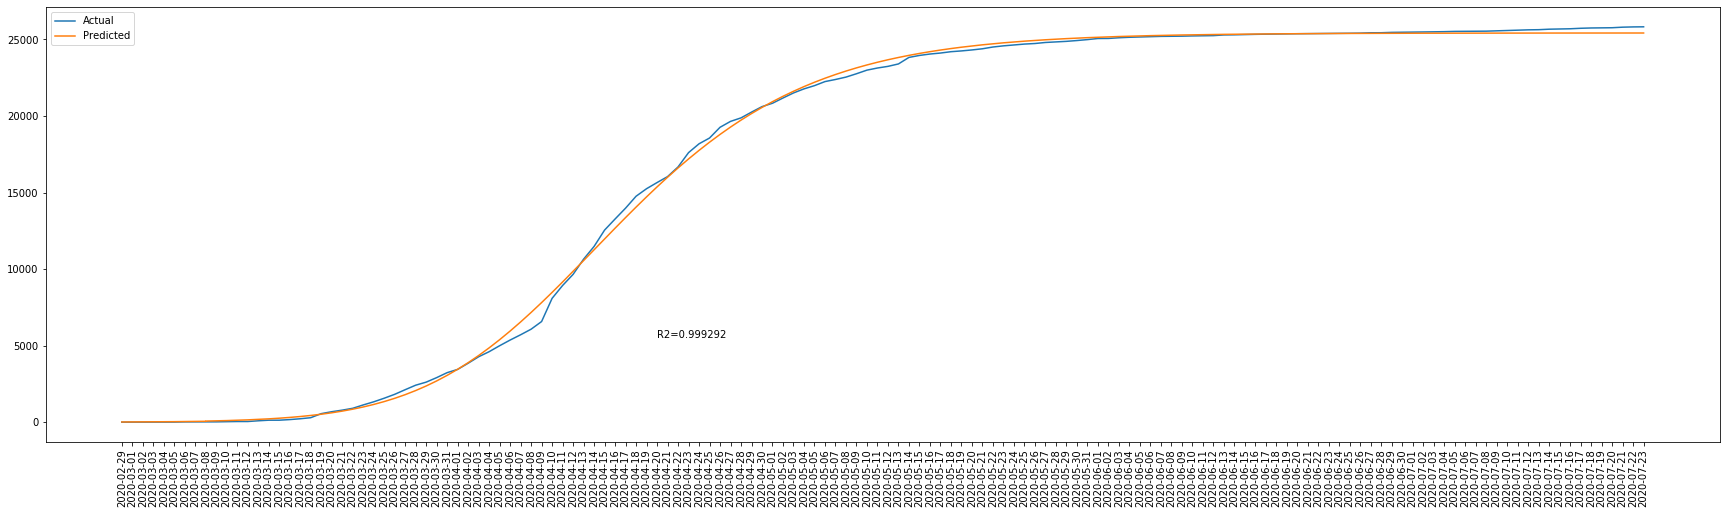

In [65]:
fig = plt.figure(figsize = (30, 8))
ax = fig.add_subplot(1, 1, 1)
y_fit = [x * 10000 for x in logistic_model(init0/10000, 486, fit['x'], len(overall_data['Confirmed']))]
y_val = overall_data['Confirmed']

r2score_irl = 1 - np.sum((y_val - y_fit)**2)/np.sum((y_val - np.mean(y_val))**2)

ax.plot(overall_data['Date'], y_val, label = "Actual")
ax.plot(overall_data['Date'], y_fit, label = 'Predicted')

ax.text('2020-04-20', 5500, 'R2=%f'%r2score_irl)

ax.legend(loc='best')

plt.xticks(rotation = 90)

In [66]:
datemin_irl = np.datetime64(overall_data['Date'].tolist()[0])
datemax_irl = np.datetime64(overall_data['Date'].tolist()[-1])

historical_dates_irl = [datemin_irl + np.timedelta64(x, 'D') for x in range(overall_data.shape[0])]
predicted_dates_irl = [datemax_irl] + [datemax_irl + np.timedelta64(x, 'D') for x in range(1, 31)]

In [67]:
cumulative_cases_irl = overall_data['Confirmed'].tolist() + pred_irl
cumuative_dates_irl = historical_dates_irl[1:] + predicted_dates_irl

(array([737485., 737516., 737546., 737577., 737607., 737638.]),
 <a list of 6 Text xticklabel objects>)

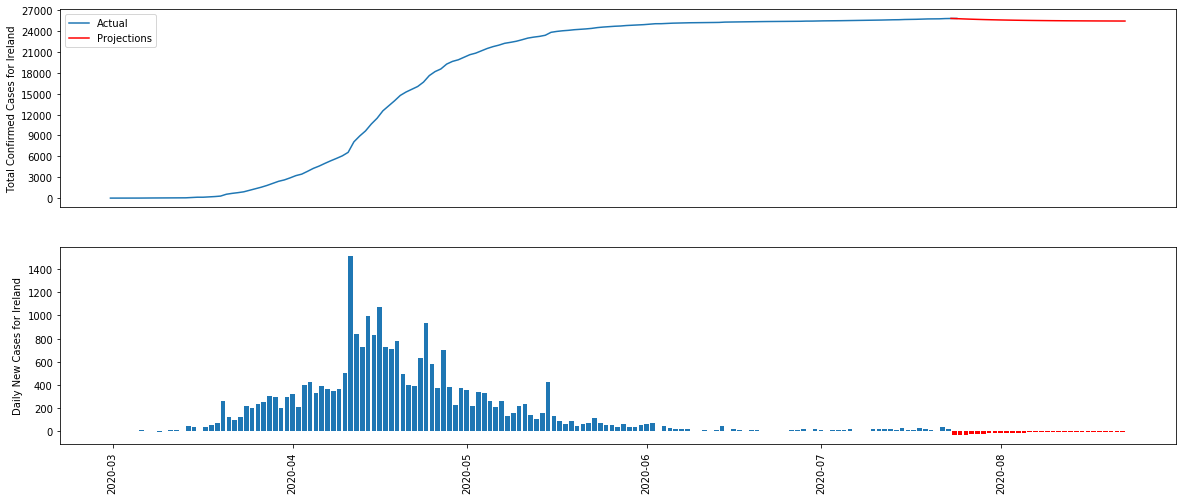

In [68]:
fig = plt.figure(figsize = (20, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(historical_dates_irl, overall_data['Confirmed'].tolist(), label = 'Actual')
ax1.plot(predicted_dates_irl, pred_irl, label = 'Projections', color = "Red")
ax1.set_xticks([])
ax1.set_yticks(range(0, 30000, 3000))
ax1.set_ylabel('Total Confirmed Cases for Ireland')
ax1.legend(loc = 'best')

ax2.bar(historical_dates_irl[1:], np.diff(overall_data['Confirmed']), label = "Actual")
ax2.bar(predicted_dates_irl[1:], np.diff(pred_kil), color = "Red")
ax2.set_ylabel('Daily New Cases for Ireland')
plt.xticks(rotation = 90)

In [69]:
trend_fit_irl = [x * 10000 for x in logistic_model(init0/10000, 486, fit['x'], overall_data.shape[0] + 30)]
trend_hist_irl = overall_data['Confirmed'].tolist()
historical_dates_irl = [datemin + np.timedelta64(x, 'D') for x in range(overall_data.shape[0])]
predicted_dates_irl = [datemin + np.timedelta64(x, 'D') for x in range(overall_data.shape[0] + 30)]

C:\Users\Neeraj Chavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



(array([737516., 737546., 737577., 737607., 737638., 737669.]),
 <a list of 6 Text xticklabel objects>)

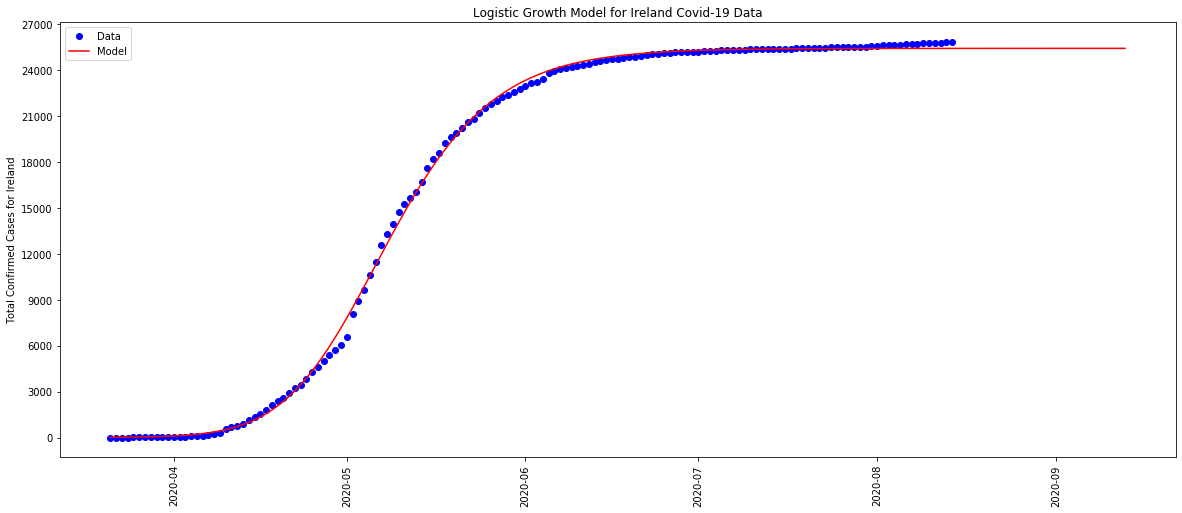

In [70]:
fig = plt.figure(figsize = (20, 8))
plt.title('Logistic Growth Model for Ireland Covid-19 Data')
ax = fig.add_subplot(1, 1, 1)

ax.plot(historical_dates_irl, trend_hist_irl, 'bo',label = 'Data')
ax.plot(predicted_dates_irl, trend_fit_irl, label = 'Model', color = 'Red')
ax.set_yticks(range(0, 30000, 3000))
ax.set_ylabel('Total Confirmed Cases for Ireland')
ax.legend(loc = 'best')

plt.xticks(rotation = 90)